<a href="https://colab.research.google.com/github/myconcordia/A2I2/blob/main/Tutorial_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autoencoders**

An autoencoder is an unsupervised neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

![Random Unsplash Image](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

**Import Python Modules**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

#from sklearn.metrics import accuracy_score, precision_score, recall_score
#from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Model

# use seaborn plotting style defaults
import seaborn as sns; sns.set()


**Load and Prepare Data**

In [ ]:
#Since autoencoders are unsupervised learning models, we don't need the labels.
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Normalize the images from the interval [0,255] to [0,1] for better training
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'test samples')

#Flatten the 28x28 images into 784-dimensional vectors
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

11493376/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28, 1)
60000 training samples
10000 test samples


**Display Sample Images from the Training Set**

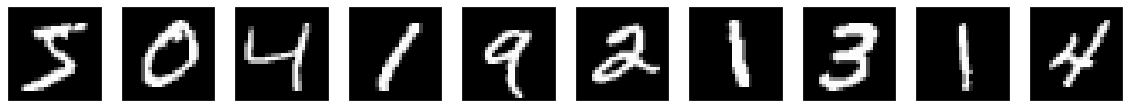

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(10):
  ax = plt.subplot(1, 10, i + 1)
  plt.imshow(X_train[i].reshape(28, 28))
  #plt.title("Input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

**Build the Autoencoder**

In [ ]:
input_size = 784
code_size = 64

#Input, encoder and decoder
x = layers.Input(shape=(input_size,))
a = layers.Dense(code_size, activation='relu')(x)
xhat = layers.Dense(input_size, activation='sigmoid')(a)
#Autoencoder
autoencoder = Model(x, xhat)
#Compile the autoencoder with Adam optimizer, and using MSE as loss function
autoencoder.compile(optimizer='adam', loss='mse')

**Display the structure of the autoencoder**

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


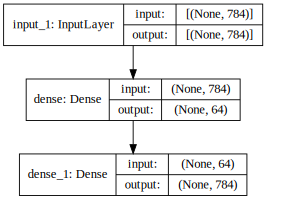

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

**Display the structure of the encoder**

In [ ]:
encoder = Model(x, a)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


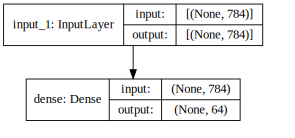

In [ ]:
SVG(model_to_dot(encoder, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

**Train the Autoencoder**

Train the model using X_train as both the input and the target. The encoder will learn to compress the dataset from 784 dimensions to the latent space, and the decoder will learn to reconstruct the original images.

In [ ]:
history = autoencoder.fit(X_train, X_train,
                          epochs=20,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Epoch 1/20
469/469 [==============================] - 5s 4ms/step - loss: 0.0442 - val_loss: 0.0223
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0175 - val_loss: 0.0132
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0110 - val_loss: 0.0086
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0077 - val_loss: 0.0065
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0061 - val_loss: 0.0054
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0043 - val_loss: 0.0041

**Test the Autoencoder**

Let's predict on our test dataset and display the original image together with the code and the prediction from our autoencoder.

Notice how the predictions are pretty close to the original images, although not quite the same

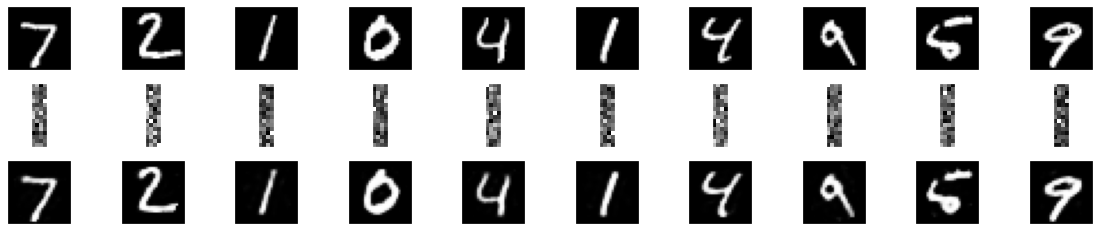

In [ ]:
#Reconstructed images
decoded_imgs = autoencoder.predict(X_test)
#Encoded images
encoded_imgs = encoder.predict(X_test)

#Visualization
n = 10 #number of digits to be displayed
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  #plt.title("Input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(16,4))
  #plt.title("Code")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstructed image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  #plt.title("Reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
print(encoded_imgs.mean())

**Plot the Loss Functions**

dict_keys(['loss', 'val_loss'])


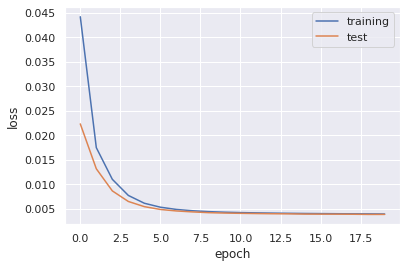

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

# **Deep Autoencoders**
A stacked autoencoder is a deep neural network consisting of multiple layers of stacked encoders from several autoencoders. This stacked network is pre-trained layer by layer in an unsupervised fashion, where the output from the encoder of the first autoencoder is the input of the second autoencoder, the output from the encoder of the second autoencoder is the input to the third autoencoder, and so on. 

**Build the Deep Autoencoder**

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


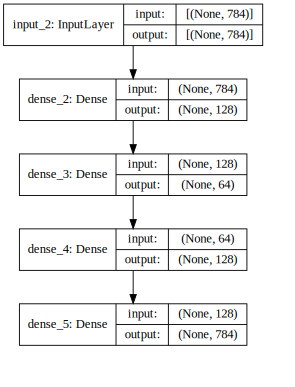

In [ ]:
input_size = 784
hidden_size = 128
code_size = 64

x = layers.Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(x)
a = layers.Dense(code_size, activation='relu')(hidden_1)
hidden_2 = layers.Dense(hidden_size, activation='relu')(a)
xhat = layers.Dense(input_size, activation='sigmoid')(hidden_2)

#Deep autoecnoder
autoencoder = Model(x, xhat)
autoencoder.compile(optimizer='adam', loss='mse')

#Display the model
autoencoder.summary()
SVG(model_to_dot(autoencoder, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))


**Train the Deep Autoencoder**

In [ ]:
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0415 - val_loss: 0.0195
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0159 - val_loss: 0.0128
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0118 - val_loss: 0.0102
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0088 - val_loss: 0.0081
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0081 - val_loss: 0.0075
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0075 - val_loss: 0.0070
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0063 - val_lo

**Test the Deep Autoencoder**

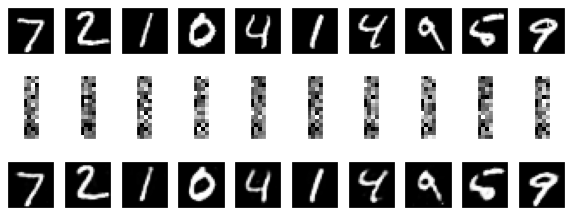

In [ ]:
#Reconstructed images
decoded_imgs = autoencoder.predict(X_test)
#Encoded images
encoder = Model(x, a)
encoded_imgs = encoder.predict(X_test)

#Visualization
n = 10 #number of digits to be displayed
plt.figure(figsize=(10, 4))
for i in range(n):
  # display original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  #plt.title("Input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(16,4))
  #plt.title("Code")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstructed image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  #plt.title("Reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

**Plot the Loss Functions**

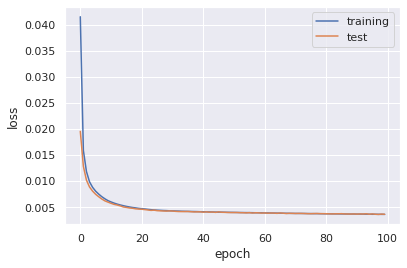

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

# **Denoising Autoencoders**
![Random Unsplash Image](https://miro.medium.com/max/1448/1*qKiQ1noZdw8k05-YRIl6hw.jpeg)

**Build the Denoising Autoencoder**

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


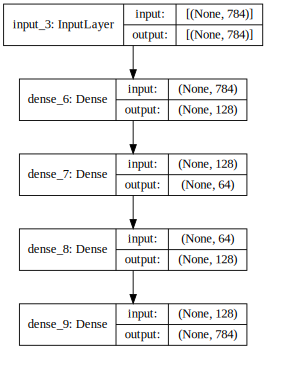

In [ ]:
input_size = 784
hidden_size = 128
code_size = 64

x = layers.Input(shape=(input_size,))
hidden_1 = layers.Dense(hidden_size, activation='relu')(x)
a = layers.Dense(code_size, activation='relu')(hidden_1)
hidden_2 = layers.Dense(hidden_size, activation='relu')(a)
xhat = layers.Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(x, xhat)
autoencoder.compile(optimizer='adam', loss='mse')

#Display the model
autoencoder.summary()
SVG(model_to_dot(autoencoder, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

**Create Noisy Data**

Add some noise to the input data and clip the values between 0 and 1

In [ ]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

**Display some Noisy Images**

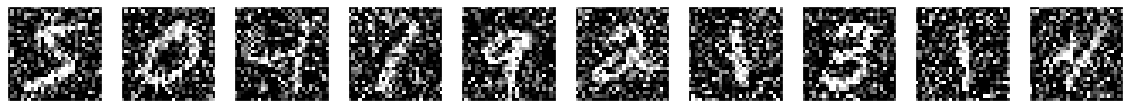

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(10):
  ax = plt.subplot(1, 10, i + 1)
  plt.imshow(X_train_noisy[i].reshape(28, 28))
  #plt.title("Input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

**Train the Denoising Autoencoder**

In [ ]:
history = autoencoder.fit(X_train_noisy, X_train,
                          epochs=20,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(X_test_noisy, X_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0501 - val_loss: 0.0318
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0285 - val_loss: 0.0255
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0245 - val_loss: 0.0228
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0223 - val_loss: 0.0213
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0210 - val_loss: 0.0203
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0200 - val_loss: 0.0194
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0192 - val_loss: 0.0187
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0186 - val_loss: 0.0183
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0182 - val_loss: 0.0179
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0178 - val_loss: 0.0175

**Test the Denoising Autoencoder**

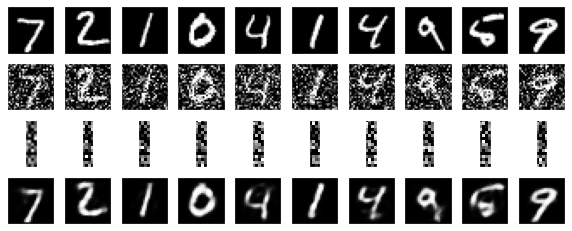

In [ ]:
#Reconstructed images
decoded_imgs = autoencoder.predict(X_test_noisy)
#Encoded images
encoder = Model(x,a)
encoded_imgs = encoder.predict(X_test_noisy)

#Visualization
n = 10 #number of digits to be displayed
plt.figure(figsize=(10, 4))
for i in range(n):
  # display original image
  ax = plt.subplot(4, n, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  #plt.title("Input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display noisy image
  ax = plt.subplot(4, n, i + 1 + n)
  plt.imshow(X_test_noisy[i].reshape(28, 28))
  #plt.title("Input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded image
  ax = plt.subplot(4, n, i + 1 + 2*n)
  plt.imshow(encoded_imgs[i].reshape(16,4))
  #plt.title("Code")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstructed image
  ax = plt.subplot(4, n, i + 1 + 3*n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  #plt.title("Reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

**Plot the Loss Functions**

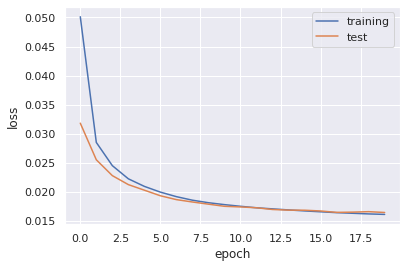

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

# **Sparse Autoencoders**

**Build the Sparse Autoencoder**

One way to constrain the representations to be compact is to add a sparsity contraint on the activity of the hidden representations, so fewer units would "fire" at a given time. In Keras, this can be done by adding an activity_regularizer to our Dense layer:

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_17 (Dense)             (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


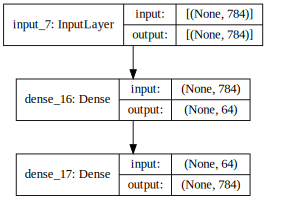

In [ ]:
from tensorflow.keras import regularizers

input_size = 784
code_size = 64

#Input, encoder and decoder
x = layers.Input(shape=(input_size,))
a = layers.Dense(code_size, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(x)
xhat = layers.Dense(input_size, activation='sigmoid')(a)
#Autoencoder
autoencoder = Model(x, xhat)
#Compile the autoencoder with Adam optimizer, and using MSE as loss function
autoencoder.compile(optimizer='adam', loss='mse')

#Display the model
autoencoder.summary()
SVG(model_to_dot(autoencoder, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

**Train the Sparse Autoencoder**

In [ ]:
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.0089
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 10/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0082 - val_lo

**Test the Sparse Autoencoder**

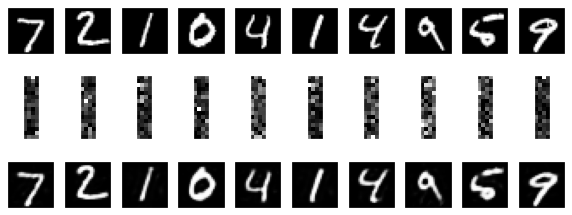

In [ ]:
#Reconstructed images
decoded_imgs = autoencoder.predict(X_test)
#Encoded images
encoder = Model(x,a)
encoded_imgs = encoder.predict(X_test)

#Visualization
n = 10 #number of digits to be displayed
plt.figure(figsize=(10, 4))
for i in range(n):
  # display original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  #plt.title("Input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(16,4))
  #plt.title("Code")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstructed image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  #plt.title("Reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

**Sparsity of Encoded Representations**

In [ ]:
print(encoded_imgs.mean())

0.2717531


**Plot the Loss Functions**

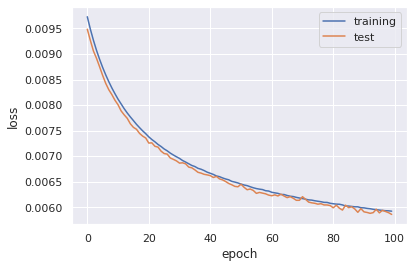

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

**Kullback-Leibler Sparsity Regularizer**

In this example, 0.01 is the regularization weight, and 0.02 is the sparsity targe

In [ ]:
import keras # if using keras
# from tensorflow import keras # if using tf.keras
kullback_leibler_divergence = keras.losses.kullback_leibler_divergence
K = keras.backend
beta = 0.01
rho = 0.2
def kl_divergence_regularizer(inputs):
    rho_hat = K.mean(inputs, axis=0)
    return beta * (kullback_leibler_divergence(rho, rho_hat)
                 + kullback_leibler_divergence(1 - rho, 1 - rho_hat))

In [ ]:
input_size = 784
code_size = 64

#Input, encoder and decoder
x = layers.Input(shape=(input_size,))
a = layers.Dense(code_size, activation='relu',
                activity_regularizer=kl_divergence_regularizer)(x)
xhat = layers.Dense(input_size, activation='sigmoid')(a)
#Autoencoder
autoencoder = Model(x, xhat)
#Compile the autoencoder with Adam optimizer, and using MSE as loss function
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.0855 - val_loss: 0.0649
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0584 - val_loss: 0.0543
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0517 - val_loss: 0.0500
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0487 - val_loss: 0.0480
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0473 - val_loss: 0.0470
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0465 - val_loss: 0.0464
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0460 - val_loss: 0.0460
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0456 - val_loss: 0.0457
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0453 - val_loss: 0.0455
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0451 - val_lo

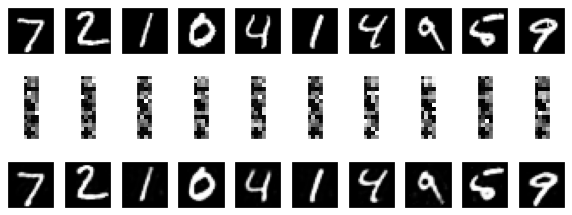

In [ ]:
#Reconstructed images
decoded_imgs = autoencoder.predict(X_test)
#Encoded images
encoder = Model(x,a)
encoded_imgs = encoder.predict(X_test)

#Visualization
n = 10 #number of digits to be displayed
plt.figure(figsize=(10, 4))
for i in range(n):
  # display original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  #plt.title("Input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(16,4))
  #plt.title("Code")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstructed image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  #plt.title("Reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

3.810837


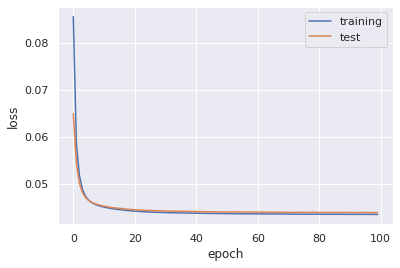

In [ ]:
print(encoded_imgs.mean())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

# **Convolutional Autoencoders**

**Load and Prepare the Data**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Build the Convolutional Autoencoder**

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 4, 4, 8)           0   

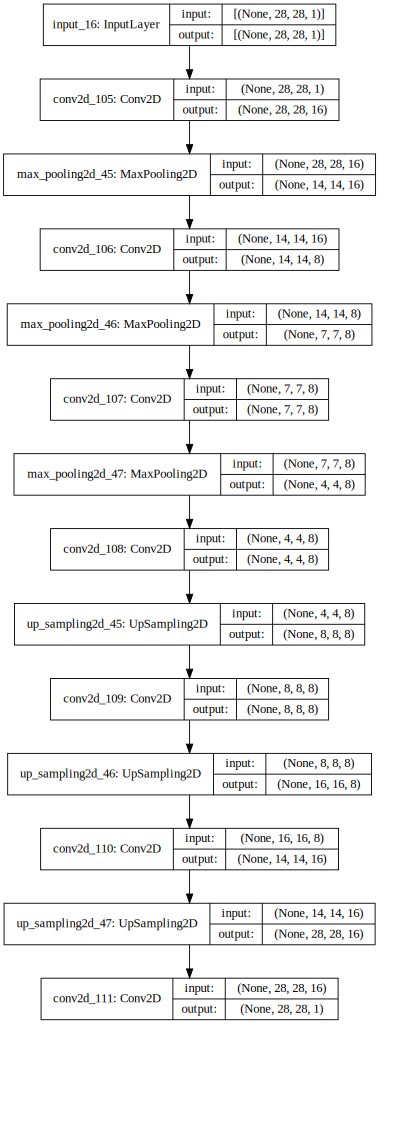

In [ ]:
import keras
from keras import layers

# Input, Encoder and Decoder
x = keras.Input(shape=(28, 28, 1))
conv1_1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = layers.MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = layers.MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
a = layers.MaxPooling2D((2, 2), padding='same')(conv1_3)
# The encoded representation is (4, 4, 8) i.e. 128-dimensional
conv2_1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(a)
up1 = layers.UpSampling2D((2, 2))(conv2_1)
conv2_2 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = layers.UpSampling2D((2, 2))(conv2_2)
conv2_3 = layers.Conv2D(16, (3, 3), activation='relu')(up2)
up3 = layers.UpSampling2D((2, 2))(conv2_3)
xhat = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

# Autoencoder
autoencoder = keras.Model(x, xhat)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Display the model
autoencoder.summary()
SVG(model_to_dot(autoencoder, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

In [ ]:
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Epoch 1/100
469/469 [==============================] - 7s 12ms/step - loss: 0.3113 - val_loss: 0.1521
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1458 - val_loss: 0.1303
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1284 - val_loss: 0.1206
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1202 - val_loss: 0.1148
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1153 - val_loss: 0.1111
Epoch 6/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1115 - val_loss: 0.1086
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1091 - val_loss: 0.1060
Epoch 8/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1069 - val_loss: 0.1043
Epoch 9/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1052 - val_loss: 0.1027
Epoch 10/100
469/469 [==============================] - 5s 10ms/step - loss: 0.103

**Test the Convolutional Autoencoder**

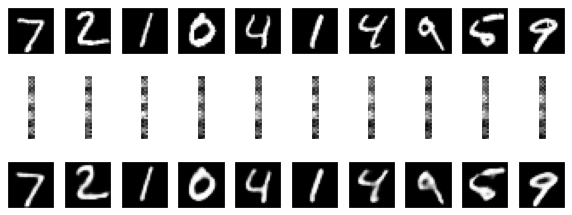

In [ ]:
#Reconstructed images
decoded_imgs = autoencoder.predict(X_test)
#Encoded images
encoder = Model(x, a)
encoded_imgs = encoder.predict(X_test)

#Visualization
n = 10 #number of digits to be displayed
plt.figure(figsize=(10, 4))
for i in range(n):
  # display original image
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(X_test[i].reshape(28, 28))
  #plt.title("Input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display encoded image
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(32,4))
  #plt.title("Code")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstructed image
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  #plt.title("Reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

**Plot the Loss Functions**

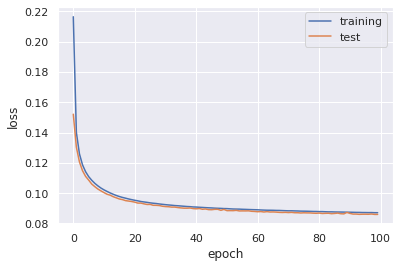

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='upper right')
plt.show()